# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


['jos',
 'bredasdorp',
 'hirara',
 'mataura',
 'albany',
 'shimoni',
 'rikitea',
 'jamestown',
 'avarua',
 'karaul',
 'areosa',
 'manokwari',
 'georgetown',
 'matveyevka',
 'airai',
 'amalapuram',
 'seoul',
 'upernavik',
 'kaitangata',
 'ponta do sol',
 'evensk',
 'east london',
 'hobart',
 'port-gentil',
 'carnarvon',
 'butaritari',
 'ijui',
 'ushuaia',
 'half moon bay',
 'victoria',
 'yellowknife',
 'alice springs',
 'berga',
 'mar del plata',
 'springbok',
 'tiksi',
 'iberia',
 'bluff',
 'lorengau',
 'palabuhanratu',
 'fort saint john',
 'bethel',
 'faya',
 'puerto ayora',
 'mahenge',
 'saint-philippe',
 'arlit',
 'lima',
 'hermanus',
 'arraial do cabo',
 'kjollefjord',
 'mazagao',
 'port alfred',
 'busselton',
 'hilo',
 'touros',
 'kapaa',
 'hofn',
 'viedma',
 'illoqqortoormiut',
 'nizhneyansk',
 'talnakh',
 'amga',
 'yar-sale',
 'ibra',
 'aden',
 'barrow',
 'segovia',
 'sao joao da barra',
 'kodiak',
 'tuktoyaktuk',
 'tabiauea',
 'ancud',
 'nanortalik',
 'laguna',
 'port elizabeth

In [49]:
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
base_url = f"{url}appid={weather_api_key}&units={units}&q="

In [51]:
base_url

'http://api.openweathermap.org/data/2.5/weather?appid=48ca130e383ad0ad93006ebda4e88ac0&units=metric&q='

In [52]:
query_url = base_url + city

In [54]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=48ca130e383ad0ad93006ebda4e88ac0&units=metric&q=cayenne'

In [40]:
response = requests.get(base_url).json()
response

{'coord': {'lon': 134.63, 'lat': 67.63},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 28.61,
  'feels_like': 26.98,
  'temp_min': 28.61,
  'temp_max': 28.61,
  'pressure': 1013,
  'humidity': 23,
  'sea_level': 1013,
  'grnd_level': 992},
 'wind': {'speed': 0.85, 'deg': 79},
 'clouds': {'all': 0},
 'dt': 1592522624,
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 36000,
 'id': 2027044,
 'name': 'Batagay',
 'cod': 200}

In [41]:
# List of City data
lat = []
lon = []
temp = []
humidity = [] 
cloudy = []
windspee = []
count = 0
cityname = []
dt = []

In [63]:
# Get weather data
print("Beginning Data Retrival")
print("-----------------------------")
set_count = 1
record_count = 1
weather_data = {"City":[],"Lat":[],"Lng":[],"Max Temp":[],"Humidity":[],"Cloudiness":[],"Wind Speed": [],"Country":[],"Date":[]}
for city in cities:
    weather_response = requests.get(base_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrival
-----------------------------
Processing Record 1 of Set 1 | jos
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hirara
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | shimoni
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | avarua
City not found. Skipping...
Processing Record 10 of Set 1 | areosa
Processing Record 11 of Set 1 | manokwari
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | matveyevka
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | amalapuram
Processing Record 16 of Set 1 | seoul
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | evensk
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 |

Processing Record 34 of Set 4 | palotina
Processing Record 35 of Set 4 | aksu
Processing Record 36 of Set 4 | kaeo
Processing Record 37 of Set 4 | mayor pablo lagerenza
Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | karatau
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | flinders
City not found. Skipping...
Processing Record 42 of Set 4 | itarema
Processing Record 43 of Set 4 | mariental
Processing Record 44 of Set 4 | santa maria
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | makakilo city
Processing Record 47 of Set 4 | poltavka
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | merauke
Processing Record 50 of Set 4 | aswan
Processing Record 0 of Set 5 | angoche
Processing Record 1 of Set 5 | adrar
City not found. Skipping...
Processing Record 2 of Set 5 | tilichiki
Processing Record 3 of Set 5 | pangody
Processing Record 4 of Set 5 | mbour
Processing Record 5 of Set 5 | na

Processing Record 19 of Set 8 | inhambane
Processing Record 20 of Set 8 | yartsevo
Processing Record 21 of Set 8 | bakaly
Processing Record 22 of Set 8 | varhaug
Processing Record 23 of Set 8 | walvis bay
Processing Record 24 of Set 8 | payakumbuh
Processing Record 25 of Set 8 | margate
Processing Record 26 of Set 8 | erzin
Processing Record 27 of Set 8 | bambous virieux
City not found. Skipping...
Processing Record 28 of Set 8 | kuryk
Processing Record 29 of Set 8 | christchurch
Processing Record 30 of Set 8 | michigan city
Processing Record 31 of Set 8 | sharya
Processing Record 32 of Set 8 | princeville
Processing Record 33 of Set 8 | mae sai
Processing Record 34 of Set 8 | lakes entrance
Processing Record 35 of Set 8 | uchaly
Processing Record 36 of Set 8 | sao filipe
Processing Record 37 of Set 8 | moindou
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | los llanos de aridane
Processing Record 40 of Set 8 | quatre cocos
Processing Record 41 of Set 8 |

Processing Record 2 of Set 12 | yorkton
Processing Record 3 of Set 12 | gayeri
Processing Record 4 of Set 12 | nianzishan
City not found. Skipping...
Processing Record 5 of Set 12 | lagoa
City not found. Skipping...
Processing Record 6 of Set 12 | bandarbeyla
Processing Record 7 of Set 12 | puerto maldonado
Processing Record 8 of Set 12 | wajima
Processing Record 9 of Set 12 | pevek
Processing Record 10 of Set 12 | walcz
Processing Record 11 of Set 12 | tazovskiy
Processing Record 12 of Set 12 | tabas
City not found. Skipping...
Processing Record 13 of Set 12 | chipinge
Processing Record 14 of Set 12 | avera
Processing Record 15 of Set 12 | bandipur
Processing Record 16 of Set 12 | korla
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
weather_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [140]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jos,9.92,8.90,18.51,81,87,1.86,NG,1592524041
1,bredasdorp,-34.53,20.04,8.00,87,0,2.72,ZA,1592524041
2,hirara,24.80,125.28,30.00,79,75,9.80,JP,1592523968
3,mataura,-46.19,168.86,7.03,71,0,2.81,NZ,1592524041
4,albany,42.60,-73.97,29.44,53,58,1.70,US,1592523795


In [141]:
# Export data to csv
weather_df.to_csv('weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [142]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.902357,13.714419,19.517747,70.074523,48.332756,3.553899,1.592524e+09
std,33.609601,86.983740,8.037911,22.103049,36.874602,2.480368,8.436999e+01
min,-54.800000,-175.200000,0.000000,3.000000,0.000000,0.060000,1.592524e+09
25%,-8.750000,-58.650000,13.270000,59.000000,9.000000,1.500000,1.592524e+09
50%,25.280000,19.920000,20.830000,77.000000,48.000000,3.100000,1.592524e+09
75%,50.050000,80.550000,26.000000,87.000000,82.000000,4.830000,1.592524e+09
max,78.220000,179.320000,39.000000,100.000000,100.000000,19.000000,1.592524e+09


In [143]:
#  No Cities with Humidity >100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

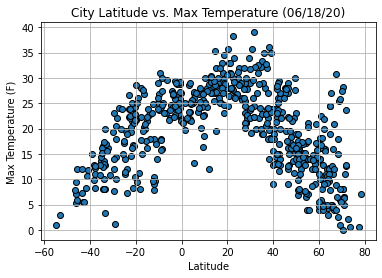

In [144]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolor="black")

# Labels
plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save as PNG and Show
plt.savefig("LatVTemp.png")
plt.show()

## Latitude vs. Humidity Plot

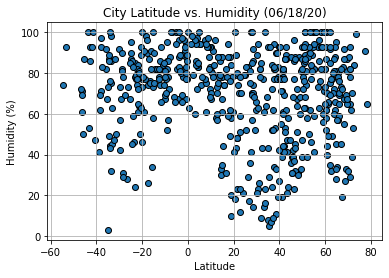

In [145]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolor="black")

# Labels
plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save as PNG and Show
plt.savefig("LatVHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

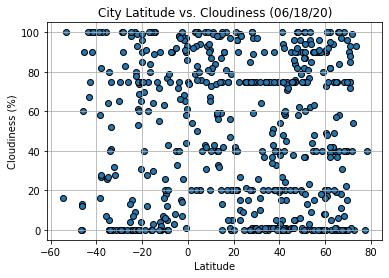

In [146]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolor="black")

# Labels
plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save as PNG and Show
plt.savefig("LatVCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

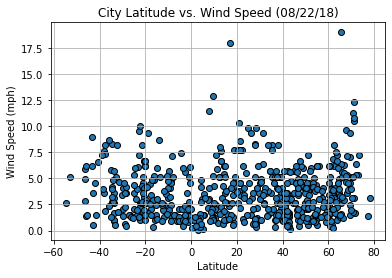

In [147]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolor="black")

# Labels
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save as PNG and Show
plt.savefig("LatVWindSpeed.png")
plt.show()

## Linear Regression

In [148]:
# OPTIONAL: Create a function to create Linear Regression plots

In [149]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
s_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [150]:
n_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jos,9.92,8.90,18.51,81,87,1.86,NG,1592524041
2,hirara,24.80,125.28,30.00,79,75,9.80,JP,1592523968
4,albany,42.60,-73.97,29.44,53,58,1.70,US,1592523795
7,jamestown,42.10,-79.24,26.00,44,40,3.10,US,1592523876
9,areosa,41.72,-8.86,15.00,82,0,3.60,PT,1592524042


In [151]:
n_hemisphere.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02
mean,40.101494,10.584911,20.048962,67.637975,48.827848,3.583468,1.592524e+09
std,20.022416,85.709339,8.439946,23.418789,36.153027,2.588877,8.346574e+01
min,0.520000,-173.300000,0.000000,5.000000,0.000000,0.060000,1.592524e+09
25%,22.910000,-63.730000,13.855000,52.000000,15.000000,1.500000,1.592524e+09
50%,41.760000,18.590000,21.040000,74.000000,48.000000,3.100000,1.592524e+09
75%,57.285000,78.950000,27.000000,86.000000,82.000000,4.800000,1.592524e+09
max,78.220000,179.320000,39.000000,100.000000,100.000000,19.000000,1.592524e+09


In [152]:
s_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bredasdorp,-34.53,20.04,8.00,87,0,2.72,ZA,1592524041
3,mataura,-46.19,168.86,7.03,71,0,2.81,NZ,1592524041
5,shimoni,-4.65,39.38,24.73,82,33,7.43,KE,1592524042
6,rikitea,-23.12,-134.97,23.82,85,100,6.08,PF,1592524042
8,avarua,-21.21,-159.78,24.00,64,69,4.60,CK,1592524042


In [153]:
s_hemisphere.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02
mean,-20.766099,20.506484,18.364835,75.362637,47.258242,3.489725,1.592524e+09
std,13.108154,89.550448,6.970798,17.882685,38.474133,2.232218,8.540335e+01
min,-54.800000,-175.200000,1.000000,3.000000,0.000000,0.340000,1.592524e+09
25%,-31.147500,-54.225000,12.637500,67.000000,5.000000,1.522500,1.592524e+09
50%,-20.495000,21.120000,19.805000,78.000000,54.000000,2.965000,1.592524e+09
75%,-9.942500,109.282500,23.927500,87.000000,82.750000,4.895000,1.592524e+09
max,-0.120000,173.780000,31.000000,100.000000,100.000000,10.010000,1.592524e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6891518687106288


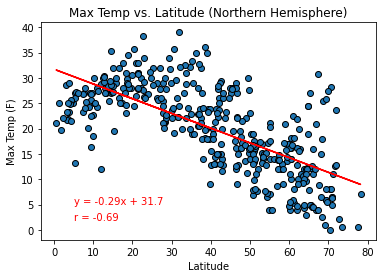

In [155]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(n_hemisphere["Lat"], n_hemisphere["Max Temp"])
regress_values = n_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = n_hemisphere["Lat"]
y_axis = n_hemisphere["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(n_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (5,5), color='red', fontsize=10)
plt.annotate(r_value, (5,2), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Latitude (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("TempVLat-NHemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7234273666781549


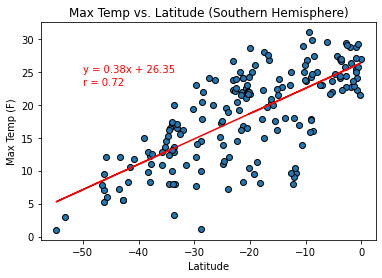

In [161]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(s_hemisphere["Lat"], s_hemisphere["Max Temp"])
regress_values = s_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = s_hemisphere["Lat"]
y_axis = s_hemisphere["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(s_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (-50,25), color='red', fontsize=10)
plt.annotate(r_value, (-50,23), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Latitude (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("TempVLat-SHemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03176186833745359


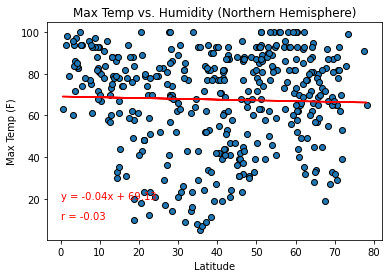

In [165]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(n_hemisphere["Lat"], n_hemisphere["Humidity"])
regress_values = n_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = n_hemisphere["Lat"]
y_axis = n_hemisphere["Humidity"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(n_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (0,20), color='red', fontsize=10)
plt.annotate(r_value, (0,10), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("HumidityVLat-NHemisphere.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24334958075191868


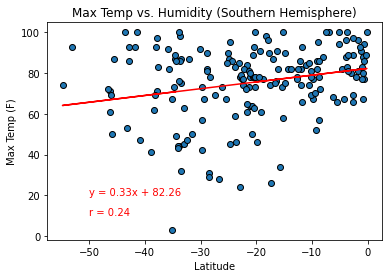

In [168]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(s_hemisphere["Lat"], s_hemisphere["Humidity"])
regress_values = s_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = s_hemisphere["Lat"]
y_axis = s_hemisphere["Humidity"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(s_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (-50,20), color='red', fontsize=10)
plt.annotate(r_value, (-50,10), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("HumidityVLat-SHemisphere.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10000155313316211


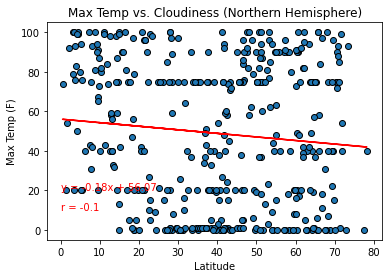

In [173]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(n_hemisphere["Lat"], n_hemisphere["Cloudiness"])
regress_values = n_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = n_hemisphere["Lat"]
y_axis = n_hemisphere["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(n_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (0,20), color='red', fontsize=10)
plt.annotate(r_value, (0,10), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("CloudinessVLat-NHemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10239822483679938


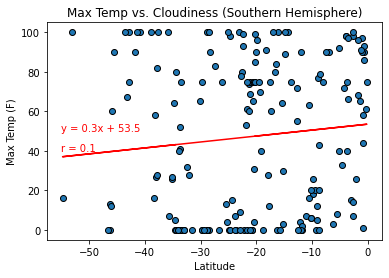

In [176]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(s_hemisphere["Lat"], s_hemisphere["Cloudiness"])
regress_values = s_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = s_hemisphere["Lat"]
y_axis = s_hemisphere["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(s_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (-55,50), color='red', fontsize=10)
plt.annotate(r_value, (-55,40), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("CloudinessVLat-SHemisphere.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10156891657500369


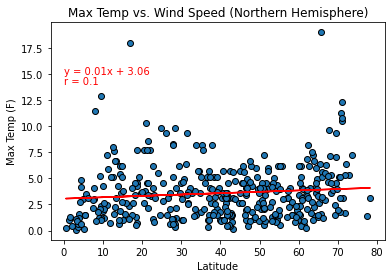

In [177]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(n_hemisphere["Lat"], n_hemisphere["Wind Speed"])
regress_values = n_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = n_hemisphere["Lat"]
y_axis = n_hemisphere["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(n_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (0,15), color='red', fontsize=10)
plt.annotate(r_value, (0,14), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("WindVLat-NHemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23988240259471783


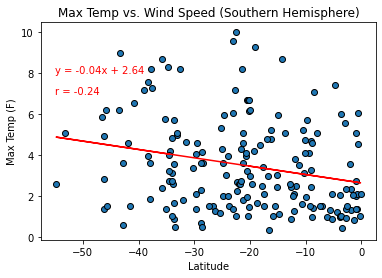

In [179]:
# Calculate the correlation coefficient and linear regression model 
(slope, intercept,rvalue, pvalue, stderr) = linregress(s_hemisphere["Lat"], s_hemisphere["Wind Speed"])
regress_values = s_hemisphere["Lat"] * slope + intercept

# Scatter Plot
x_axis = s_hemisphere["Lat"]
y_axis = s_hemisphere["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Regression Line
plt.plot(s_hemisphere["Lat"], regress_values, color='red')
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value = f"r = {round(rvalue,2)}"
plt.annotate(line_eq, (-55,8), color='red', fontsize=10)
plt.annotate(r_value, (-55,7), color='red', fontsize=10)

# Labels
plt.title("Max Temp vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("WindVLat-SHemisphere.png")
plt.show()